# Lab 7

Chouliaras Andreas 2143

Pappas Apostolos 2109
 
Gkountouvas Stylianos 1973

# Comparison of Classification Methods


|Classification Model   | Pros |  Cons| 
|------------------------:|---------------------:|----------|
|logistic Regression |Probabilistic approach, gives informations about statistical significance of features|           The Logistic Regression Assumptions|
|K-NN                     |               Simple to understand, fast and efficient|      Need to choose the number of neighbours k |
|SVM	|Performant, not biased by outliers, not sensitive to overfitting|Not appropriate for non linear problems, not the best choice for large number of features|
|Kernel SVM   |                       High performance on nonlinear problems, not biased by outliers, not sensitive to overfitting|Not the best choice for large number of features, more complex|
|Naive Bayes |                            Efficient, not biased by outliers, works on nonlinear problems, probabilistic approach|Based on the assumption that features have same statistical relevance|
|Decision Tree Classification|               Interpretability, no need for feature scaling, works on both linear / nonlinear problems|Poor results on too small datasets, overfitting can easily occur|
|Random Forest Classification|            Powerful and accurate, good performance on many problems, including non linear|Not appropriate for non linear problems, not the best choice for large number of features|



In [1]:
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix


%matplotlib inline

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")

In [4]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

X[:, 1] = X[:, 1] / 1000
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\IliasAlexis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


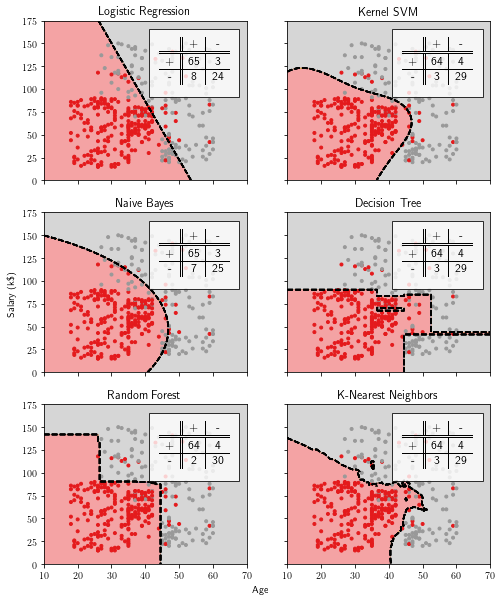

In [5]:
classifiers = [LogisticRegression(random_state=0),
               SVC(kernel="rbf", random_state=0),
               GaussianNB(),
               DecisionTreeClassifier(criterion='entropy', random_state=0, min_samples_split=20),
               RandomForestClassifier(n_estimators=30, n_jobs=4,
                                      criterion='entropy',
                                      random_state=0, min_samples_split=40),
               KNeighborsClassifier(p=2)]
names = ["Logistic Regression", "Kernel SVM", "Naive Bayes",
         "Decision Tree", "Random Forest", "K-Nearest Neighbors"]

fig, axs = pl.subplots(3, 2, sharex="all", sharey="all", figsize=(8, 10))

for ax, name, classifier in zip(np.array(axs).flatten(), names, classifiers):
    classifier = classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)

    N = 1000
    x1 = np.linspace(10, 70, N)
    x2 = np.linspace(0, 175, N)
    X1, X2 = np.meshgrid(x1, x2)
    y_grid = classifier.predict(sc.transform(np.hstack([X1.flatten()[:, None],
                                                        X2.flatten()[:, None]])))

    pl.sca(ax)
    pl.contourf(x1, x2, y_grid.reshape((N, N)), cmap="Set1", alpha=.4)
    pl.contour(x1, x2, y_grid.reshape((N, N)), colors="black", linestyles="--")
    pl.scatter(*X.T, c=y,
               cmap="Set1", marker=".")
    
    table = (r"\begin{tabular}{ c || c | c } "
             r"  & +  & - \\ \hline \hline"
             r"+ & %i & %i \\ \hline"
             r"- & %i & %i \\"
             r"\end{tabular}") % tuple(cm.flatten().tolist())
    pl.text(44, 105, table, size=12, bbox=dict(facecolor='white',
                                               edgecolor='black',
                                               alpha=.8,
                                               pad=10))

    pl.title(name)

fig.text(0.5, 0.09, 'Age', ha='center', va='center')
fig.text(0.07, 0.5, 'Salary (k\$)', ha='center', va='center', rotation='vertical')
fig.savefig("classifiers_comparison.png", dpi=300)

\begin{exercise}
Compare these classifiers for the dataset used in the lab 4 and verify the above claims about the pros and cons.

\end{exercise}


In [4]:
df = pd.read_csv("bank.csv",sep =';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [25]:
X = df.loc[:, ['age','balance']].values
y = df.loc[:, ['y']].values.ravel()

le = LabelEncoder()
y = le.fit_transform(y)

X[:, 1] = X[:, 1] / 1000
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


C:\Users\Admin\.conda\envs\ml\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\.conda\envs\ml\lib\site-packages\ipykernel_launcher.py:31: UserWarning: No contour levels were found within the data range.
C:\Users\Admin\.conda\envs\ml\lib\site-packages\ipykernel_launcher.py:31: UserWarning: No contour levels were found within the data range.


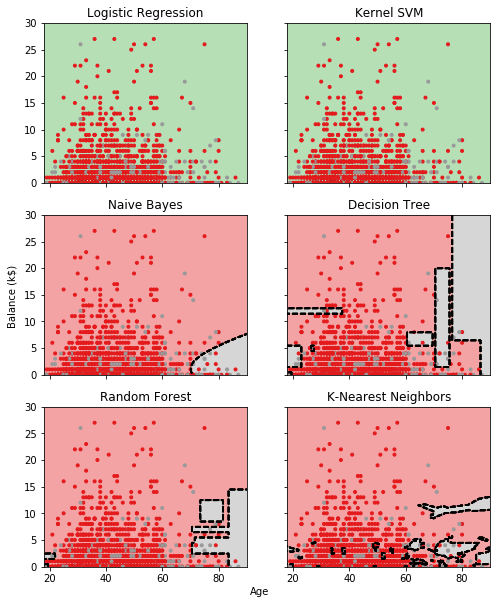

In [39]:
classifiers = [LogisticRegression(random_state=0),
               SVC(kernel="rbf", random_state=0),
               GaussianNB(),
               DecisionTreeClassifier(criterion='entropy', random_state=0, min_samples_split=20),
               RandomForestClassifier(n_estimators=30, n_jobs=4,
                                      criterion='entropy',
                                      random_state=0, min_samples_split=40),
               KNeighborsClassifier(p=2)]
names = ["Logistic Regression", "Kernel SVM", "Naive Bayes",
         "Decision Tree", "Random Forest", "K-Nearest Neighbors"]

fig, axs = pl.subplots(3, 2, sharex="all", sharey="all", figsize=(8, 10))
pl.xlim([18,90])
pl.ylim([0,30])
    
for ax, name, classifier in zip(np.array(axs).flatten(), names, classifiers):
    classifier = classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    N = 1000
    x1 = np.linspace(0, 100, N)
    x2 = np.linspace(0, 100, N)
    X1, X2 = np.meshgrid(x1, x2)
    y_grid = classifier.predict(sc.transform(np.hstack([X1.flatten()[:, None],
                                                        X2.flatten()[:, None]])))

    pl.sca(ax)
    pl.contourf(x1, x2, y_grid.reshape((N, N)), cmap="Set1", alpha=.4)
    pl.contour(x1, x2, y_grid.reshape((N, N)), colors="black", linestyles="--")
    pl.scatter(*X.T, c=y,
               cmap="Set1", marker=".")
    '''
    table = (r"\begin{tabular}{ c || c | c } "
             r"  & +  & - \\ \hline \hline"
             r"+ & %i & %i \\ \hline"
             r"- & %i & %i \\"
             r"\end{tabular}") % tuple(cm.flatten().tolist())
    pl.text(44, 105, table, size=12, bbox=dict(facecolor='white',
                                               edgecolor='black',
                                               alpha=.8,
                                               pad=10))
    '''
    pl.title(name)
    
fig.text(0.5, 0.09, 'Age', ha='center', va='center')
fig.text(0.07, 0.5, 'Balance (k\$)', ha='center', va='center', rotation='vertical')
fig.savefig("classifiers_comparison.png", dpi=300)

\begin{exercise}
For each of the classifiers considered in this note book  write the mathematical model govern  each method and the optimization method used.

\end{exercise}


\begin{exercise}
Prepare presentation for following classifiers 

* K-NN
* Naive Bayes
* Decision Tree
* Random Forest

using the material of the book "100 pages ML"


\end{exercise}
